In [29]:
from BIFParser import *
import Factor

from random import uniform
import numpy as np
import pandas as pd
import copy
from matplotlib.pyplot import plot
from matplotlib.pyplot import figure

from time import time

In [111]:
# print n[2].dist
# print n[2].getStates()

# num_test = uniform(0,99)
# print num_test
# num_test = int(num_test / len(n[2].getStates()))
# print num_test
# print int(num_test%len(n[2].getStates()))
# print n[2].getStates()[int(num_test%len(n[2].getStates()))]


# for nn in n[5].getParents():
#     print nn.getIndex(),
    
    
# n[5].printNode()
test_nodes = generate_nodes('data/ASIA/asia.bif')
t = time()
num = 10
a = []
for i in range (num):
    a+=[sample(test_nodes, test_nodes[0], 0)]
print time() - t

df = pd.DataFrame(np.array(a), columns=[n.getName() for n in test_nodes] )
#     print generate_sample_values(test_nodes)
# test_nodes[1].getDist()

0.0024881362915


,asia,tub,smoke,lung,bronc,either,xray,dysp
0,0,1,1,1,0,1,1,1
1,0,1,1,1,1,1,1,1
2,0,0,1,1,1,0,0,0
3,0,1,0,1,0,1,1,0
4,0,1,0,1,1,1,1,1
5,0,1,0,1,0,1,1,1
6,0,1,0,1,0,1,1,0
7,0,1,0,1,1,1,1,1
8,0,1,1,1,0,1,1,0
9,0,1,1,1,1,1,1,1


In [10]:
def generate_nodes(path):
    file = open(path)
    BIF = file.readlines()
    BIF = fixWhiteSpace(BIF)
    return parseBIF(BIF)

In [108]:
def selectIndex(dist, val):
    n = 0
    for i in range(len(dist)) :
        n += dist[i]
        if n>=val:
            return i

def getValue(rv, v, n):
    if(rv[n.getIndex()]!=None):
        return rv[n.getIndex()]
    if n.numParents() == 0:
        rv[n.getIndex()] = selectIndex(n.getDist().values()[0], v[n.getIndex()])
        return rv[n.getIndex()]
    key = ((n.getStates(), ))
    p_key = ()
    for p in n.getParents():
        p_key += (p.getStates()[getValue(rv, v, p)], )
    key+= (p_key, )
    rv[n.getIndex()] = selectIndex(n.getDist()[key], v[n.getIndex()])
    return rv[n.getIndex()]

def sample(nodes, node=None, val_index=None):
    v = [uniform(0,1) for n in nodes]
    rv = {n.getIndex(): None for n in nodes}
    if(node!=None and val_index!=None):
        rv[node.getIndex()] = val_index
    sample = []
    for n in nodes:
        sample.append(getValue(rv, v, n))
    return sample

In [82]:
def converge(last_values, new_values):
    val = 0
    for i in range(len(last_values)):
        val += np.abs(last_values[i] - new_values[i])
        
    return True if val <= 0.0000001 else False

In [92]:
def hope(nodes, sample, n):
    b = 1.0
    a = 1.0
    
    for node in n.getChildren():
        key = (node.getStates(), )
        p_vals = ()
        for p in node.getParents():
            states = p.getStates()
            p_vals += (states[sample[p.getIndex()]], )
        key += (p_vals, )
        b *= node.dist.get(key)[sample[node.getIndex()]]
        a *= 1-node.dist.get(key)[sample[node.getIndex()]]
        
    if n.isRoot():
        b *= n.dist.get(n.getStates())[int(sample[n.getIndex()])]
        a *= 1-n.dist.get(n.getStates())[int(sample[n.getIndex()])]
    else:
        key = (n.getStates(), )
        p_vals = ()
        for p in n.getParents():
            states = p.getStates()
            p_vals += (states[sample[p.getIndex()]], )
        key += (p_vals, )
        b *= n.dist.get(key)[sample[n.getIndex()]]
        a *= 1-n.dist.get(key)[sample[n.getIndex()]]
        
    
#     for i in range(len(nodes)):
# #         print '-----------'
#         if n.isRoot() and n.getName == nodes[i].getName:
#             b *= n.dist.get(n.getStates())[int(sample[n.getIndex()])]
#             a *= 1-nodes[j].dist.get(n.getStates())[int(v[j])]
            
#         elif n.getName == nodes[j].getName:
#             key =  (n.getStates(), ) 
#             p_vals = ()
#             for p in n.getParents():
#                 states = p.getStates()
#                 p_vals += (states[v[p.getIndex()]], )
#             key += (p_vals, )
            
#             b *= nodes[j].dist.get(key)[int(v[j])]
#             a *= 1-nodes[j].dist.get(key)[int(v[j])]
            
#         elif nodes[j].isParent(n):
#             key = (nodes[j].getStates(), )
#             p_vals = ()
#             local_a = 0.0
#             for p in  nodes[j].getParents():
#                 states = p.getStates()
#                 p_vals += (states[v[p.getIndex()]], )
#             key += (p_vals, )
#             b *= nodes[j].dist.get(key)[int(v[j])]
            
#             for state_index in range(len(n.getStates())):
#                 if state_index != n.getIndex():
#                     key = (nodes[j].getStates(), )
#                     p_vals = ()
#                     for p in  nodes[j].getParents():
#                         states = p.getStates()
#                         p_vals += (states[v[p.getIndex()] if p.getName()!=n.getName() else state_index], )
#                     key += (p_vals, )
#                     local_a += nodes[j].dist.get(key)[int(v[j])]
# #                     if p.getName()==n.getName():  
# #                     print key
# #                     print local_a
# #                     print  nodes[j].dist
# #                     print nodes[j].dist.get(key)[int(v[j])]
# #                     print v
# #                     print key
# #                     print j
# #                     print nodes[j].getIndex()
# #                     print '--------------------------------------------'
#             a*=local_a
#             print a
    
    
#         elif nodes[j].isChildren(n):
#             key =  (nodes[j].getStates(), ) 
            
#             p_vals = ()
#             for p in nodes[j].getParents():
#                 states = p.getStates()
#                 p_vals += (states[v[p.getIndex()]], )
#             key += (p_vals, )
            
#             b *= nodes[j].dist.get(key)[int(v[j])]
#             a *= np.sum( n.dist.get(key)[:int(v[j])]+n.dist.get(key)[int(v[j])+1:])
        
#         if key_b!=():
# #             print nodes[j].dist
#             b *= nodes[j].dist.get(key)[int(v[j])]
#             a *= np.sum( nodes[j].dist.get(key)[:int(v[j])]+nodes[j].dist.get(key)[int(v[j])+1:])      
            
#         print key
#         print b
#         print a
#         
#     print '--------------------------------------------'
    
    a = b + a
#     print a
#     print b
    return b/a if a!= 0 else 0
#     return 0
            
            

In [175]:
def gibbs_sampling(path):
    chart_data = []
    nodes = generate_nodes(path)
    num_int = 0
    len_nodes = len(nodes)
    last_values = [uniform(0, 1) for i in range(len_nodes)]
    new_values = [uniform(0, 1) for i in range(len_nodes)]
    
    selected_node = nodes[0]
    selected_node_vals = 1
    test_data = []
    
#     while not converge(last_values, new_values) and num_int<20:
#         num_int+=1
#         last_values = copy.deepcopy(new_values)
#         new_values = [hope(nodes, sample(nodes, selected_node, selected_node_vals), nodes[i]) for i in range(len_nodes)]
#         print new_values
#         chart_data.append(hope(nodes, sample(nodes), nodes[0]))
# #         print last_values
# #         print new_values
# #         print generate_sample_values(len_nodes, 0,last_values) 





    cont_vals = [0.0 for i in selected_node.getStates()]
    num_times = 1000
    t = time()
    for i in range(num_times):
        s = sample(nodes)
        cont_vals[s[selected_node.getIndex()]]+=1
#         if s[selected_node.getIndex()] == selected_node_vals:
#             cont_val+=1
        test_data += [[cont_val/(i+1) for cont_val in cont_vals]]
        
    print time() - t
#     plot(range(num_times), test_data)
#     figure(num=None, figsize=(10, 4), dpi=80, facecolor='w', edgecolor='k')
    df = pd.DataFrame(np.array(test_data))
    df.plot(figsize=(15,5))
    return df

        
#     plot(range(len(chart_data)), np.array(chart_data), scalex=500)
#     print len(chart_data)
#     np.seterr('raise')
#     return new_values

10.1132421494


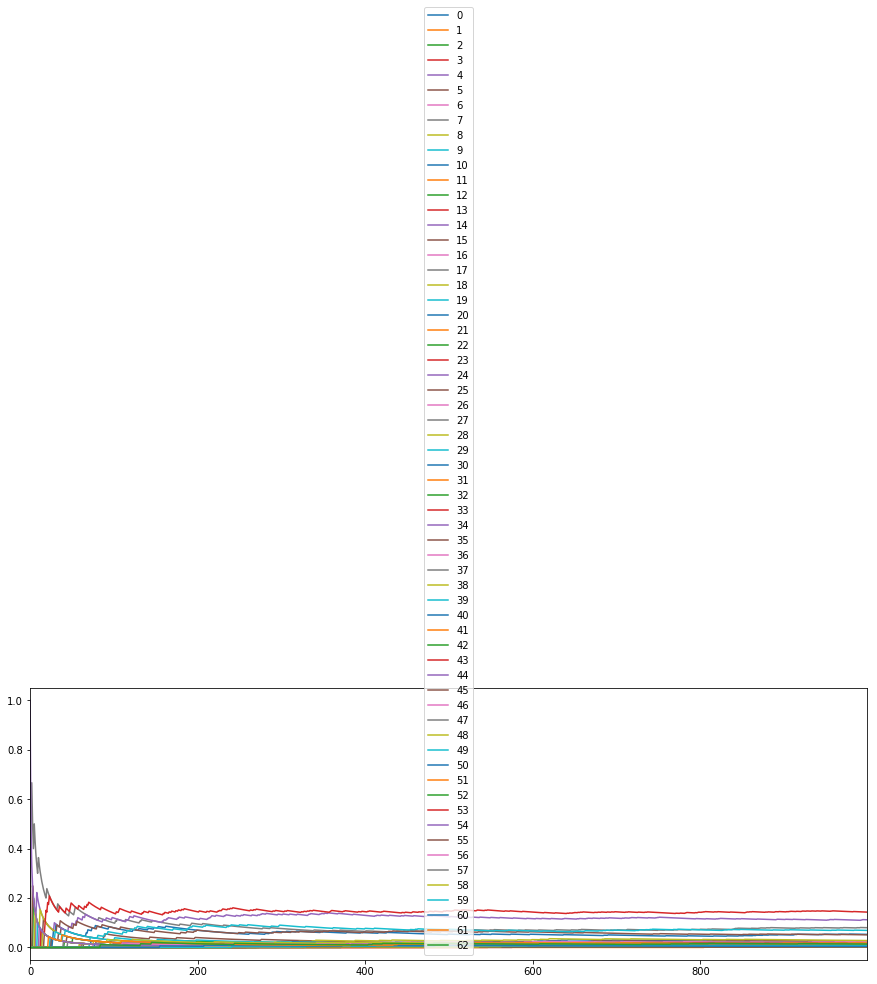

In [176]:
df = gibbs_sampling('data/PATHFINDER/pathfinder.bif')

In [43]:
file = open('data/ASIA/asia.bif')
BIF = file.readlines()
BIF = fixWhiteSpace(BIF)
n = parseBIF(BIF)
for nn in n:
    print nn.printNode()

asia
Index: 
0
Parents: 
CPD: 
{('yes', 'no'): (0.01, 0.99)}
Children: 
tub

None
tub
Index: 
1
Parents: 
asia
CPD: 
{(('yes', 'no'), ('yes',)): (0.05, 0.95), (('yes', 'no'), ('no',)): (0.01, 0.99)}
Children: 
either

None
smoke
Index: 
2
Parents: 
CPD: 
{('yes', 'no'): (0.5, 0.5)}
Children: 
lung
bronc

None
lung
Index: 
3
Parents: 
smoke
CPD: 
{(('yes', 'no'), ('yes',)): (0.1, 0.9), (('yes', 'no'), ('no',)): (0.01, 0.99)}
Children: 
either

None
bronc
Index: 
4
Parents: 
smoke
CPD: 
{(('yes', 'no'), ('yes',)): (0.6, 0.4), (('yes', 'no'), ('no',)): (0.3, 0.7)}
Children: 
dysp

None
either
Index: 
5
Parents: 
lung
tub
CPD: 
{(('yes', 'no'), ('no', 'yes')): (1.0, 0.0), (('yes', 'no'), ('yes', 'no')): (1.0, 0.0), (('yes', 'no'), ('no', 'no')): (0.0, 1.0), (('yes', 'no'), ('yes', 'yes')): (1.0, 0.0)}
Children: 
xray
dysp

None
xray
Index: 
6
Parents: 
either
CPD: 
{(('yes', 'no'), ('yes',)): (0.98, 0.02), (('yes', 'no'), ('no',)): (0.05, 0.95)}
Children: 

None
dysp
Index: 
7
Parents: 
br

In [14]:
n[0].dist.values()[0][1]

# for nn in n:
#     print nn.printNode()
#     print nn.getDist().keys()

0.99

In [33]:
np.abs(2.0-1)

1.0

In [79]:
n[0].dist

{('yes', 'no'): (0.01, 0.99)}

In [25]:
print n[0].dist.get("('yes', 'no')

None


In [82]:
n[1].getParents()

[<Node.Node instance at 0x1058d3488>]

In [86]:
n[1].getStates()

('yes', 'no')

In [87]:
n[1].getDist()

{(('yes', 'no'), ('no',)): (0.01, 0.99),
 (('yes', 'no'), ('yes',)): (0.05, 0.95)}

In [89]:
n[1].getParents()

[<Node.Node instance at 0x11b4680e0>]